In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

#disable annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
info_df = pd.read_csv('id_information_mmsr.tsv', sep='\t')
mfcc_stats_df = pd.read_csv('id_mfcc_stats_mmsr.tsv', sep='\t')
mfcc_bow_df = pd.read_csv('id_mfcc_bow_mmsr.tsv', sep='\t')
blf_df = pd.read_csv('id_blf_logfluc_mmsr.tsv', sep='\t')
ivec_df = pd.read_csv('id_ivec256_mmsr.tsv', sep='\t')
dnn_df = pd.read_csv('id_musicnn_mmsr.tsv', sep='\t')
genre_df = pd.read_csv('id_genres_mmsr.tsv', sep='\t')
full_dataset = pd.merge(info_df, genre_df, on='id')

In [3]:
#full_dataset.head()

Since in the new dataset we only have IDs we build a helper function to retrieve id from song and artist, and viceversa.

In [15]:
def find_song_info(*args, info_df):
    if len(args) == 1:
        song_id = args[0]
        song_info = info_df[info_df['id'] == song_id]

        if not song_info.empty:
            return song_info.iloc[0]['artist'], song_info.iloc[0]['song']
        else:
            raise ValueError(f"ID {song_id} not in the dataset.")

    elif len(args) == 2:
        artist, song = args
        matching_songs = info_df[(info_df['artist'] == artist) & (info_df['song'] == song)]

        if not matching_songs.empty:
            return matching_songs.iloc[0]['id']
        else:
            raise ValueError(f"Song {song} by {artist} not in the dataset.")


_____________________________________________________

In [16]:
#set query song for exaples
query_song = {'id': '3uNmJmetcUAMc9WR', 'artist': 'The Beatles', 'song': 'Strawberry Fields Forever - Remastered 2009', 'album': 'Magical Mystery Tour (Remastered)', 'genre': ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']}
N = 10  

# **Music retrieval systems**

*  **MFCC**: statistical descriptors<br>
*   **BLF**: logfuc<br>
*   **i-vectors**: 256<br>
*   **DNN**
  
  

</div>
</details>

In [17]:
def music_retrieval(artist, song, df, info_df, N):
    try:
        query_id = find_song_info(artist, song, info_df=info_df) # retrieve id of the song from artist and title
        query_vector = df[df['id'] == query_id].iloc[0, 1:].values
    except IndexError:
        print('Song ID not found!')
        return
    
    all_songs = df.iloc[:, 1:].values  
    similarities = cosine_similarity([query_vector], all_songs).flatten()
    
    top_indices = similarities.argsort()[-N-1:-1][::-1]
    top_similar_songs = df.iloc[top_indices].copy() 
    top_similar_songs['similarity'] = similarities[top_indices]  

   
    top_similar_songs['artist'], top_similar_songs['song'] = zip(*top_similar_songs['id'].apply(lambda x: find_song_info(x, info_df=info_df)))
    # Merge with genre data
    top_similar_songs = pd.merge(top_similar_songs, genre_df, on='id', how='left')

    # rearrange columns as in assignment 1
    column_order = ['id', 'artist', 'song', 'genre', 'similarity']
    return top_similar_songs[column_order]



In [19]:
#1st retrieval system
mfcc_retrieved_songs = music_retrieval(query_song['artist'], query_song['song'], mfcc_stats_df, info_df, N)
print("-"*30)
print(f"MSCC {N} recommendations for: {query_song['song']}")
print("Genre: ", query_song['genre'])   
print("-"*30)
display(mfcc_retrieved_songs.style.hide(axis="index"))

------------------------------
MSCC 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
FrQpwvVF1fwzNps7,RuPaul,Get Your Rebel On,"['pop', 'dance pop', 'synthpop']",0.940585
qUkFjTESBWgMVveZ,A Tribe Called Quest,Award Tour,"['hip hop', 'rap', 'underground hip hop', 'old school hip hop', 'jazz', 'funk', 'jazz rap', 'jazz fusion', 'alternative hip hop', 'east coast hip hop', 'soul', 'blues', 'avant garde']",0.938520
0qp2KyXH2ustSNci,Naughty By Nature,O.P.P,"['hip hop', 'rap', 'rock', 'soul', 'funk', 'jazz', 'pop', 'disco', 'classic rock', 'nu jazz', 'metal', 'bossa nova', 'alternative rock', 'reggae', 'emo', 'folk', 'experimental', 'hard rock', 'downtempo', 'singer songwriter', 'new wave', 'motown', 'psychedelic soul', 'funk metal', 'jazz funk', 'latin', 'blues', 'techno', 'house', 'acid jazz', 'lounge', 'jazz fusion', 'contemporary jazz', 'trip hop', 'broken beat', 'r b', 'breakbeat', 'meditation', 'smooth jazz', 'rave', 'modern funk', 'rhythm and blues']",0.937468
PwTLKKsM34cgBDDm,Zebrahead,Up in Smoke,"['pop punk', 'rap rock']",0.936964
jybxjKBDKZjKsXNh,Calvin Harris,Feels,"['pop', 'ska', 'dance pop', 'funk', 'nu disco']",0.936825
fpspvnC1jELCCN1C,Junior Senior,Move Your Feet,"['pop', 'electronica', 'dance pop', 'disco', 'electropop', 'house', 'indie pop', 'rock', 'electro', 'funk', 'nu disco', 'trance', 'eurodance']",0.936438
2K0JDCBAlEvRXqrl,dEUS,Everybody's Weird,"['rock', 'alternative rock', 'indie rock', 'experimental', 'dub', 'indietronica', 'alternative dance', 'art pop']",0.934833
3ThxO5Q3A29V2vnd,Skepta,Lyrics,"['hip hop', 'grime']",0.934241
8GmcQtqYZKj7TSFx,SUPERFRUIT,Sexy Ladies,"['pop', 'soul']",0.932075
RJUjLrAkXV2Jj3qH,Jason Derülo,Ridin' Solo,"['pop', 'hip hop', 'r b', 'techno', 'rap', 'disco', 'singer songwriter', 'rhythm and blues']",0.931831


In [31]:
columns = ['id', 'query_n', 'artist', 'song', 'genre', 'similarity']
q1 = {"song": "Strawberry Fields Forever - Remastered 2009", "artist": "The Beatles"}
q2 =  {"song": "Personal Jesus", "artist": "Depeche Mode"}
q3 =  {"song": "El carretero", "artist": "Buena Vista Social Club"}


In [38]:
#code to produce top 100 for each query
#mfcc = music_retrieval(q3['artist'], q3['song'], mfcc_stats_df, info_df, 100)
#mfcc["query_n"] = "query_3"
#mfcc = mfcc[columns]
#save as csv
#mfcc.to_csv("MFCC_top100.csv", index=False)
#mfcc.to_csv("MFCC_top100.csv", mode='a', header=False, index=False)

In [20]:
#2nd retrieval system
blf_retrieved_songs = music_retrieval(query_song['artist'], query_song['song'], blf_df, info_df, N)
print("-"*30)
print(f"BLF {N} recommendations for: {query_song['song']}")
print("Genre: ", query_song['genre'])
print("-"*30)
display(blf_retrieved_songs.style.hide(axis="index"))

------------------------------
BLF 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
292O6dgyllt1CLjf,Father John Misty,Now I'm Learning to Love the War,"['rock', 'folk', 'indie rock', 'singer songwriter', 'country rock']",0.979295
2yplse7inSaOiBgM,Xiu Xiu,Hyunhye's Theme,"['experimental', 'indie rock', 'noise', 'indie pop', 'avant garde']",0.977370
eZRZJrGFC45RYGYU,Elysion,Killing My Dreams,"['gothic metal', 'metal', 'gothic rock', 'symphonic metal']",0.976698
qx856tJyAiQXXbeu,Luiz Melodia,Memórias Modestas,"['world', 'latin']",0.976588
Iu8G75bCsdyXIiIe,Ney Matogrosso,As Rosas Não Falam,"['bossa nova', 'mpb', 'samba', 'soul', 'world']",0.975885
6QLJJqMmlkrsa8pz,Jessica Simpson,Let Him Fly,"['pop', 'country', 'dance pop', 'teen pop', 'pop rock']",0.975882
D0AdTflgurMzFo8y,Maroon 5,Daylight,"['pop', 'rock', 'pop rock', 'alternative rock', 'soft rock', 'afrobeat', 'pop punk']",0.975795
OkMyyoU8miAyCSac,The Young Veins,Nothing Matters But You,['indie rock'],0.975790
Il4JempJ0dxcVphD,Mallu Magalhães,Te Acho Tão Bonito,['mpb'],0.975725
1XWVVvhUWhjBTVBH,Chico Buarque,Sinhá,['mpb'],0.975603


In [44]:
#blf = music_retrieval(q3['artist'], q3['song'], blf_df, info_df, 100)
#blf["query_n"] = "query_3"
#blf = blf[columns]
#blf.to_csv("BLF_top100.csv", index=False)
#blf.to_csv("BLF_top100.csv", mode='a', header=False, index=False)

In [21]:
# 3nd retr system
ivec_retrieved_songs = music_retrieval(query_song['artist'], query_song['song'], ivec_df, info_df, N)
print("-"*30)
print(f"i-vectors {N} recommendations for: {query_song['song']}")
print("Genre: ", query_song['genre'])
print("-"*30)
display(ivec_retrieved_songs.style.hide(axis="index"))

------------------------------
i-vectors 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
4r1IjzqHAOYQlgfS,Eminem,Fall,"['rap', 'hip hop']",0.451509
2wpBAJJvohmYlNLa,The Wombats,Here Comes The Anxiety,"['indie rock', 'rock', 'alternative rock', 'pop rock', 'disco', 'punk', 'indie pop', 'new wave', 'britpop', 'post punk', 'garage rock']",0.439128
iiDE169ZjdsoAiiW,Gal Costa,O Gosto Do Amor,['baiao'],0.414877
fpspvnC1jELCCN1C,Junior Senior,Move Your Feet,"['pop', 'electronica', 'dance pop', 'disco', 'electropop', 'house', 'indie pop', 'rock', 'electro', 'funk', 'nu disco', 'trance', 'eurodance']",0.396459
QcicK0XeswBkK16t,Estopa,La Raja De Tu Falda,"['pop', 'rumba', 'rock', 'spanish pop', 'flamenco']",0.389138
yFW0KNy8lvqf3rK7,Third Eye Blind,Monotov's Private Opera,"['rock', 'alternative rock', 'hard rock']",0.388687
FkZLYDfhHwgvd6Qx,Boyzone,Picture of You,"['pop', 'soundtrack', 'latin', 'boy band']",0.378367
h0Jaex0Pdbn3aVXv,Green Day,Wake Me Up When September Ends,"['rock', 'punk', 'pop punk', 'alternative rock', 'pop', 'emo', 'indie rock', 'hard rock', 'pop rock', 'singer songwriter', 'alternative pop rock', 'screamo']",0.372101
rXH5BNYLNrqLzR0Y,Breathe Carolina,Blackout,"['electropop', 'emo', 'screamo', 'electronic rock', 'pop', 'synthesizer', 'dance pop', 'synthpop', 'dubstep', 'electro', 'new wave', 'electro house', 'emocore', 'complextro', 'electronicore']",0.366228
3ZqnBypsQP9ukEiQ,Só Pra Contrariar,Essa Tal Liberdade,"['samba', 'pagode']",0.366208


In [54]:
#ivec = music_retrieval(q3['artist'], q3['song'], ivec_df, info_df, 100)
#ivec["query_n"] = "query_3"
#ivec = ivec[columns]
#ivec.to_csv("IVEC_top100.csv", index=False)
#ivec.to_csv("IVEC_top100.csv", mode='a', header=False, index=False)

In [22]:
#4th retr system
dnn_retrieved_songs = music_retrieval(query_song['artist'], query_song['song'], dnn_df, info_df, N)
print("-"*30)
print(f"DNN {N} recommendations for: {query_song['song']}")
print("Genre: ", query_song['genre'])
print("-"*30)
display(dnn_retrieved_songs.style.hide(axis="index"))

------------------------------
DNN 10 recommendations for: Strawberry Fields Forever - Remastered 2009
Genre:  ['classic rock', 'rock', 'progressive rock', 'psychedelic rock']
------------------------------


id,artist,song,genre,similarity
wVlUDLHzCYgdzzzS,Casting Crowns,Voice Of Truth,"['christian rock', 'worship', 'ccm', 'rock', 'christian music', 'gospel', 'praise', 'christian pop', 'pop rock', 'easy listening']",0.975797
GvR3ihpANzPFUV9q,Ryan Star,We Might Fall,"['rock', 'alternative rock', 'singer songwriter', 'pop', 'indie rock', 'hard rock', 'acoustic rock']",0.974290
c4DLBBGbRiYTQ66j,Rob Cantor,Shia LaBeouf Live,"['rock', 'alternative rock', 'rap', 'indie rock', 'singer songwriter', 'comedy']",0.972887
ACQtPXv35XjD9CJY,Johnny Cash,Cocaine Blues,"['country', 'folk', 'singer songwriter', 'classic rock', 'rock', 'outlaw country', 'rockabilly', 'blues', 'traditional country', 'folk rock', 'country rock']",0.972734
zDqNW4zTvRb78Jnk,Luke Bryan,Light It Up,"['country', 'country pop', 'queercore', 'brutal death metal']",0.971515
U4xTveG7s1KwuB1q,Luke Bryan,Fast,['country'],0.970846
GGiAIlRpnozeSkfe,Galantis,Dancin' to the Sound of a Broken Heart,['house'],0.970593
7IwsL07vNZbD79cP,Prince,Mary Don't You Weep (Piano & a Microphone 1983 Version),['gospel'],0.970312
bhTLRMfKnCUFzExH,David Bowie,The Man Who Sold the World,"['rock', 'classic rock', 'glam rock', 'pop', 'singer songwriter', 'progressive rock', 'alternative rock', 'psychedelic rock', 'hard rock', 'new wave', 'art rock', 'experimental', 'britpop', 'soundtrack', 'pop rock', 'rock and roll', 'noise', 'grunge', 'experimental rock', 'folk rock']",0.970207
0N5HaBTkWt5stsQa,Bezerra da Silva,Defunto Caguete,"['samba', 'mpb', 'bossa nova', 'singer songwriter', 'latin', 'carnaval', 'velha guarda']",0.970159


In [60]:
#dnn = music_retrieval(q3['artist'], q3['song'], dnn_df, info_df, 100)
#dnn["query_n"] = "query_3"
#dnn = dnn[columns]
#dnn.to_csv("DNN_top100.csv", index=False)
#dnn.to_csv("DNN_top100.csv", mode='a', header=False, index=False)

____________________________________________________________

# Evaluation

In [4]:
#load results
#audio-based
dnn_data = pd.read_csv("DNN_top100.csv")
ivec_data = pd.read_csv("IVEC_top100.csv")
blf_data = pd.read_csv("BLF_top100.csv")
mfcc_data = pd.read_csv("MFCC_top100.csv")
#text-based from assignment 1
baseline_data = pd.read_csv("baseline_top100.csv")
tfidf_data = pd.read_csv("TF-IDF_top100.csv")
w2v_data = pd.read_csv("Word2Vec_top100.csv")
bert_data = pd.read_csv("BERT_top100.csv")

In [19]:
full_dataset.head()

,id,artist,song,album_name,genre,relevant
0,01Yfj2T3YTwJ1Yfy,We As Human,Take The Bullets Away (feat. Lacey Sturm),We As Human,"['rock', 'christian rock']",True
1,01gyRHLquwXDlhkO,The Notorious B.I.G.,Somebody's Gotta Die,Life After Death (Remastered Edition),"['hip hop', 'rap', 'grindcore', 'death metal']",False
2,01rMxQv6vhyE1oQX,Against the Current,Chasing Ghosts,In Our Bones,"['rock', 'pop punk']",True
3,02RGE9FNH65RtMS7,Barthezz,Infected,Trance - The Early Years (1997-2002),"['trance', 'techno', 'progressive trance']",False
4,02ZnlCGZEbkfCDxo,Laura Pausini,Tra Te E Il Mare,The Best of Laura Pausini - E Ritorno Da Te,"['pop', 'italian pop', 'latin', 'europop', 'am...",True


In [5]:
query_genres = {
    "query_1": ['classic rock', 'rock', 'progressive rock', 'psychedelic rock'],
    "query_2": ['new wave', 'synthpop', 'rock', 'pop', 'electronica', 'alternative rock', 'industrial', 'electro',
                'alternative dance', 'classic rock', 'new romantic', 'post punk', 'electronic rock', 'electropop',
                'britpop', 'blues rock', 'techno', 'dark wave'],
    "query_3": ['latin', 'world', 'latin jazz', 'jazz', 'son cubano', 'salsa', 'bolero', 'folk', 'easy listening',
                'trova', 'soundtrack', 'pop', 'rock', 'bossa nova', 'reggae', 'tango', 'lounge']
}

In [6]:
def check_relevance(retrieved_genres, query_genres):
    
    retrieved_genres_set = set(eval(retrieved_genres))  # Convert string representation of list to actual list
    query_genres_set = set(query_genres)
    return len(retrieved_genres_set.intersection(query_genres_set)) > 0 #at least 1 genre in common

In [7]:
systems_data = [dnn_data, ivec_data, blf_data, mfcc_data, baseline_data, tfidf_data, w2v_data, bert_data]
systems_legend = ['DNN', 'i-vectors', 'BLF', 'MFCC', 'Baseline', 'TF-IDF', 'Word2Vec', 'BERT']

In [8]:
for df in [dnn_data, ivec_data, blf_data, mfcc_data, baseline_data, tfidf_data, w2v_data, bert_data ]: #for each system
    df['relevant'] = df.apply(lambda row: check_relevance(row['genre'], query_genres[row['query_n']]), axis=1) #for each query we check if they have at least 1 genre in common & store T/F

#example usage
dnn_data.head()

,id,query_n,artist,song,genre,similarity,relevant
0,wVlUDLHzCYgdzzzS,query_1,Casting Crowns,Voice Of Truth,"['christian rock', 'worship', 'ccm', 'rock', '...",0.975797,True
1,GvR3ihpANzPFUV9q,query_1,Ryan Star,We Might Fall,"['rock', 'alternative rock', 'singer songwrite...",0.974290,True
2,c4DLBBGbRiYTQ66j,query_1,Rob Cantor,Shia LaBeouf Live,"['rock', 'alternative rock', 'rap', 'indie roc...",0.972887,True
3,ACQtPXv35XjD9CJY,query_1,Johnny Cash,Cocaine Blues,"['country', 'folk', 'singer songwriter', 'clas...",0.972734,True
4,zDqNW4zTvRb78Jnk,query_1,Luke Bryan,Light It Up,"['country', 'country pop', 'queercore', 'bruta...",0.971515,False


In [9]:
def calculate_average_precision_at_k(data, k):
 
    # Ggroup the data by query
    grouped_data = data.groupby('query_n')

    total_precision = 0
    num_queries = 0

    for query_name, group in grouped_data:
        # Ensure there are enough results for the given k
        if len(group) < k:
            raise ValueError(f"Not enough results for query {query_name} to calculate precision at {k}")

        # Calculate precision for this query
        precision_at_k = group.head(k)['relevant'].sum() / k
        total_precision += precision_at_k
        num_queries += 1

    # Calculate the average precision across all queries
    average_precision = total_precision / num_queries if num_queries > 0 else 0
    return average_precision


In [10]:
def calculate_average_recall_at_k(retrieved_df, full_dataset, query_genres, k=10):
    total_recall = 0
    num_queries = 0

    for query_name, genres in query_genres.items():
        # Filter data for the specific query
        query_data = retrieved_df[retrieved_df['query_n'] == query_name]

        # Ensure there are enough results for the given k
        if len(query_data) < k:
            raise ValueError(f"Not enough results for query {query_name} to calculate recall at {k}")

        # Filter top k retrieved items
        top_k_retrieved = query_data.head(k)

        # Determine relevance for each item in the full dataset for the given query
        full_dataset['relevant'] = full_dataset['genre'].apply(lambda x: check_relevance(x, genres))

        # Count total relevant items in the full dataset
        total_relevant = full_dataset['relevant'].sum()

        # Count relevant items in the top k retrieved
        relevant_retrieved = top_k_retrieved['relevant'].sum()

        # Calculate recall for this query
        recall = relevant_retrieved / total_relevant if total_relevant > 0 else 0
        total_recall += recall
        num_queries += 1

    # Calculate the average recall across all queries
    average_recall = total_recall / num_queries if num_queries > 0 else 0
    return average_recall

# Example usage
# Assuming your dataframe and query genres are correctly set
#average_recall = calculate_average_recall_at_k(dnn_data, full_dataset, query_genres, 10)

_______________________

In [7]:
def compute_precision_recall_for_k_values(data, max_k):
    """
    Compute precision and recall for all k values up to max_k for a specific query.

    Parameters:
    data (pd.DataFrame): DataFrame with the retrieval results for a specific query.
    max_k (int): Maximum value of k to consider.

    Returns:
    dict: A dictionary with k as keys and (precision, recall) tuples as values.
    """
    precision_recall_values = {}

    for k in range(1, max_k + 1):
        precision = data.head(k)['relevant'].sum() / k
        recall = data.head(k)['relevant'].sum() / data['relevant'].sum() if data['relevant'].sum() > 0 else 0
        precision_recall_values[k] = (precision, recall)

    return precision_recall_values

In [8]:

systems_data = [dnn_data, ivec_data, blf_data, mfcc_data, baseline_data, tfidf_data, w2v_data, bert_data]
systems_legend = ['DNN', 'i-vectors', 'BLF', 'MFCC', 'Baseline', 'TF-IDF', 'Word2Vec', 'BERT']
system_average_pr = []

for system_data in systems_data:
    total_pr = {k: (0, 0) for k in range(1, 101)}

    #group by query
    grouped_data = system_data.groupby('query_n')
    for _, group in grouped_data:
        pr_values = compute_precision_recall_for_k_values(group, 100)
        for k in pr_values:
            total_pr[k] = (total_pr[k][0] + pr_values[k][0], total_pr[k][1] + pr_values[k][1])

    average_pr = {k: (total_pr[k][0]/3, total_pr[k][1]/3) for k in total_pr}  
    system_average_pr.append(average_pr)

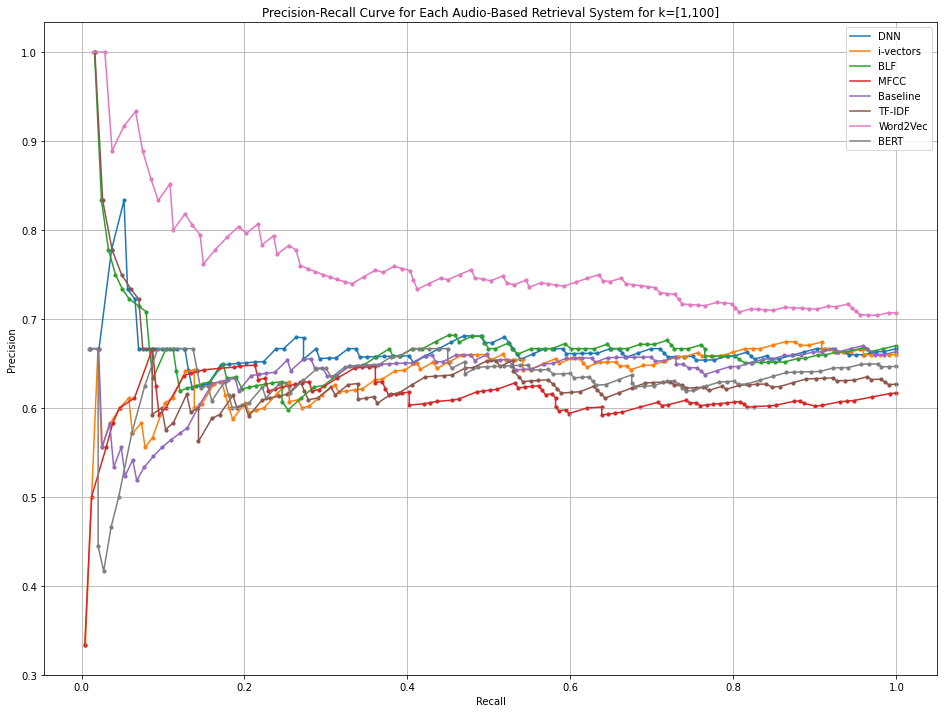

In [14]:
plt.figure(figsize=(16, 12))

for i, pr_values in enumerate(system_average_pr):
    precisions = [pr_values[k][0] for k in range(1, 101)]
    recalls = [pr_values[k][1] for k in range(1, 101)]
    plt.plot(recalls, precisions, label=systems_legend[i])
    plt.scatter(recalls, precisions, s=10)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Audio-Based Retrieval System for k=[1,100]')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
def sorensen_dice_coefficient(set1, set2):
    if not set1 or not set2:
        return 0.0
    return 2 * len(set1.intersection(set2)) / (len(set1) + len(set2))

In [13]:
def calculate_nDCG_at_10(df, full_df, query_genres):
    DCG = 0
    IDCG = 0

    # For DCG
    for index, row in df.head(10).iterrows():
        relevance = sorenson_dice_coefficient(set(eval(row['genre'])), set(query_genres))
        DCG += relevance / np.log2(index + 2)  # index + 2 because log base 2 of 1 is 0

    # For IDCG
    ideal_relevances = []
    for index, row in full_df.iterrows():
        relevance = sorenson_dice_coefficient(set(eval(row['genre'])), set(query_genres))
        ideal_relevances.append(relevance)
    ideal_relevances.sort(reverse=True)

    for i in range(min(10, len(ideal_relevances))):
        IDCG += ideal_relevances[i] / np.log2(i + 2)

    # Calculate nDCG@10
    nDCG = DCG / IDCG if IDCG > 0 else 0

    return nDCG


In [14]:
def calculate_average_nDCG_at_10(df, full_df, query_genres):
    total_nDCG = 0
    num_queries = 0

    for query_label, query_genre_set in query_genres.items():
        # Filter the system's dataframe for the current query
        query_df = df[df['query_n'] == query_label]
        nDCG = calculate_nDCG_at_10(query_df, full_df, query_genre_set)
        total_nDCG += nDCG
        num_queries += 1

    average_nDCG = total_nDCG / num_queries if num_queries > 0 else 0
    return average_nDCG


In [15]:
def calculate_genre_diversity_at_10(dataframe):
    # Collect all unique genres
    unique_genres = set()
    for genres in dataframe['genre']:
        unique_genres.update(genres)
    unique_genres = list(unique_genres)

    genre_diversity_sum = 0.0

    for query_index in range(3):  # For each query
        genre_distribution_sum = [0.0] * len(unique_genres)

        # Process top 10 tracks for the current query
        for row_index, row in dataframe.iloc[query_index*10:(query_index+1)*10].iterrows():
            genres = row['genre']

            for genre in genres:
                genre_index = unique_genres.index(genre)
                genre_distribution_sum[genre_index] += 1 / len(genres)

        # Normalize the sum of genre distributions
        normalized_distribution = [count / 10 for count in genre_distribution_sum]

        # Calculate Shannon's entropy for this query
        genre_diversity = -sum(p * math.log2(p) if p > 0 else 0 for p in normalized_distribution)
        genre_diversity_sum += genre_diversity

    # Calculate average genre diversity over all queries
    average_genre_diversity = genre_diversity_sum / 3
    return average_genre_diversity


In [21]:
#########THIS SOULD BE THE PIPELINE#########
k = 10

zipped_systems = zip(systems_legend, systems_data)
results = []

for name, data in zipped_systems:
    
    precision_at_k = calculate_average_precision_at_k(data, k)
    recall_at_k = calculate_average_recall_at_k(data, full_dataset, query_genres, k)
    ndcg = calculate_average_nDCG_at_10(data, full_dataset, query_genres)
    gen_cov = calculate_genre_coverage_at_10(data)
    gen_div = calculate_genre_diversity_at_10(data)
    results.append((name, precision_at_k, recall_at_k, ndcg, gen_cov, gen_div)) #TO-DO: add NDGC 

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['System Name', 'Precision@k', 'Relevance@k', "NDCG@10", "Genre Coverage@k", "Genre Diversity@10"])#TO-DO: add NDGC 

# Display the results
display(results_df)


,System Name,Precision@k,Relevance@k,NDCG@10,Genre Coverage@k,Genre Diversity@10
0,DNN,0.666667,0.001003,0.090172,0.339806,4.312636
1,i-vectors,0.566667,0.000867,0.072280,0.268571,4.255011
2,BLF,0.633333,0.000901,0.066875,0.330275,4.258109
3,MFCC,0.600000,0.000874,0.057299,0.327381,4.021104
4,Baseline,0.533333,0.000765,0.076140,0.245989,4.245410
5,TF-IDF,0.600000,0.000931,0.095432,0.311798,4.253612
6,Word2Vec,0.800000,0.001204,0.096054,0.294461,4.270663
7,BERT,0.666667,0.001022,0.089620,0.279778,4.312632
